In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

tf.__version__ #checking version of tensorflow 

'1.11.0'

#Import the Fashion MNIST dataset

In [2]:
# Import fashion_mnist data set from TensorFlow
fashion_mnist = keras.datasets.fashion_mnist 

# Dividing the data set to train and test sets 
(train_images, train_labels), (test_images, test_labels) = \
    fashion_mnist.load_data()

In [3]:
# Create a list of items and store it under class_names
class_names = \
    ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
     'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Explore the data

In [4]:
# Checking the shape of the train_images set 
# with 60,000 images with each image represented as 28x28 pixels 
train_images.shape 

(60000, 28, 28)

In [5]:
# Find the length of the train_labels set ---> 60,000 labels 
len(train_labels)

60000

In [6]:
train_labels #each label is an integer ranging from 0-9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

#Preprocess the data

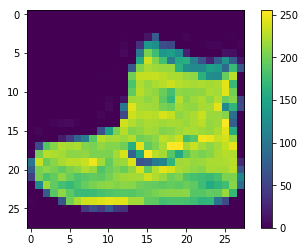

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar() #Show pixel values fall in the range of 0 to 255
plt.grid(False)

In [10]:
#Make sure to both data (train & test) are preprocessed the same way
train_images = train_images/255.0
test_images = test_images/255.0

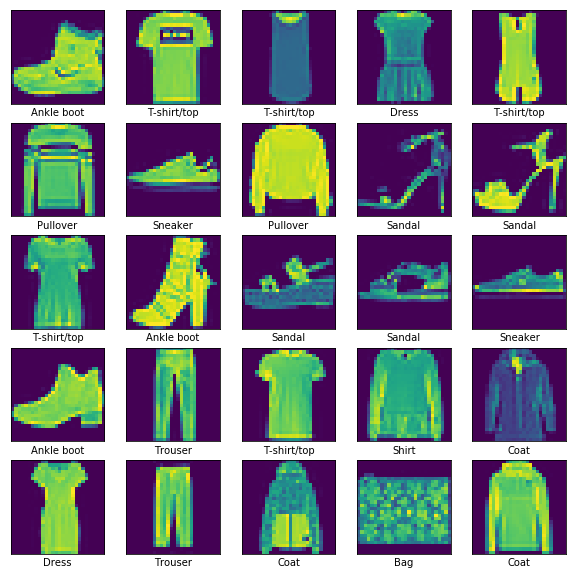

In [11]:
# Display the first 25 images from the training set and display the class name below each image. 
# Verify that the data is in the correct format and we're ready to build and train the network.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]) # cmap = plt.cm.binary
    plt.xlabel(class_names[train_labels[i]])

#Build the model

In [12]:
#Seting up the layers - the basic building block of neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#First layer: transforms the format of the images from a 2d-array (of 28 by 28 pixels), 
            # to a 1d-array of 28 * 28 = 784 pixels

#Second & Third layer: these are densely-connected, or fully-connected, neural layers. 
            # The first Dense layer has 128 nodes (or neurons). 
            # The second (and last) layer is a 10-node softmax layer
                # —this returns an array of 10 probability scores that sum to 1. 
# Each node contains a score that indicates the probability 
# that the current image belongs to one of the 10 classes.

#Compile the model

In [13]:
#Compile the model 
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#Loss function — measures how accurate the model is during training. 
    # We want to minimize this function to "steer" the model in the right direction.

#Optimizer — How the model is updated based on the data it sees and its loss function.

#Metrics —Used to monitor the training and testing steps. 

# These example uses accuracy, the fraction of the images that are correctly classified.

#Train the model

In [16]:
model.fit(train_images, train_labels, epochs = 5) 
# epochs = iteration => how many times the algorithm is going to change

Epoch 1/5
   32/60000 [..............................] - ETA: 20s - loss: 0.2718 - acc: 0.8438

  512/60000 [..............................] - ETA: 7s - loss: 0.3212 - acc: 0.8848 

  864/60000 [..............................] - ETA: 7s - loss: 0.3164 - acc: 0.8877

 1216/60000 [..............................] - ETA: 8s - loss: 0.3186 - acc: 0.8840

 1440/60000 [..............................] - ETA: 8s - loss: 0.3111 - acc: 0.8861

 1888/60000 [..............................] - ETA: 8s - loss: 0.3105 - acc: 0.8814

 2144/60000 [>.............................] - ETA: 10s - loss: 0.3057 - acc: 0.8820

 2240/60000 [>.............................] - ETA: 12s - loss: 0.2993 - acc: 0.8848

 2336/60000 [>.............................] - ETA: 13s - loss: 0.3040 - acc: 0.8823

 2592/60000 [>.............................] - ETA: 13s - loss: 0.3176 - acc: 0.8789

 2880/60000 [>.............................] - ETA: 12s - loss: 0.3138 - acc: 0.8806

 3200/60000 [>.............................] - ETA: 12s - loss: 0.3087 - acc: 0.8847

 3392/60000 [>.............................] - ETA: 12s - loss: 0.3090 - acc: 0.8835

 3424/60000 [>.............................] - ETA: 13s - loss: 0.3070 - acc: 0.8846

 3456/60000 [>.............................] - ETA: 14s - loss: 0.3073 - acc: 0.8851

 3488/60000 [>.............................] - ETA: 16s - loss: 0.3074 - acc: 0.8850

 3552/60000 [>.............................] - ETA: 18s - loss: 0.3075 - acc: 0.8849

 3648/60000 [>.............................] - ETA: 19s - loss: 0.3070 - acc: 0.8851

 3744/60000 [>.............................] - ETA: 19s - loss: 0.3082 - acc: 0.8846

 3968/60000 [>.............................] - ETA: 19s - loss: 0.3044 - acc: 0.8856

 4000/60000 [=>............................] - ETA: 21s - loss: 0.3050 - acc: 0.8855

 4096/60000 [=>............................] - ETA: 21s - loss: 0.3037 - acc: 0.8857

 4192/60000 [=>............................] - ETA: 21s - loss: 0.3061 - acc: 0.8850

 4224/60000 [=>............................] - ETA: 22s - loss: 0.3054 - acc: 0.8849

 4320/60000 [=>............................] - ETA: 22s - loss: 0.3054 - acc: 0.8856

 4384/60000 [=>............................] - ETA: 22s - loss: 0.3049 - acc: 0.8859

 4512/60000 [=>............................] - ETA: 22s - loss: 0.3047 - acc: 0.8865

 4576/60000 [=>............................] - ETA: 23s - loss: 0.3076 - acc: 0.8851

 4672/60000 [=>............................] - ETA: 23s - loss: 0.3071 - acc: 0.8853

 4864/60000 [=>............................] - ETA: 22s - loss: 0.3098 - acc: 0.8853



 5120/60000 [=>............................] - ETA: 22s - loss: 0.3111 - acc: 0.8852

 5376/60000 [=>............................] - ETA: 21s - loss: 0.3112 - acc: 0.8845

 5600/60000 [=>............................] - ETA: 21s - loss: 0.3136 - acc: 0.8832

 5824/60000 [=>............................] - ETA: 20s - loss: 0.3118 - acc: 0.8841

 6208/60000 [==>...........................] - ETA: 19s - loss: 0.3155 - acc: 0.8814

 6592/60000 [==>...........................] - ETA: 18s - loss: 0.3178 - acc: 0.8803

 6976/60000 [==>...........................] - ETA: 18s - loss: 0.3155 - acc: 0.8813

 7392/60000 [==>...........................] - ETA: 17s - loss: 0.3145 - acc: 0.8823

 7904/60000 [==>...........................] - ETA: 16s - loss: 0.3178 - acc: 0.8815

 8480/60000 [===>..........................] - ETA: 15s - loss: 0.3175 - acc: 0.8816

 8960/60000 [===>..........................] - ETA: 14s - loss: 0.3176 - acc: 0.8817

 9408/60000 [===>..........................] - ETA: 14s - loss: 0.3165 - acc: 0.8821

 9920/60000 [===>..........................] - ETA: 13s - loss: 0.3147 - acc: 0.8828

10400/60000 [====>.........................] - ETA: 13s - loss: 0.3139 - acc: 0.8836

10816/60000 [====>.........................] - ETA: 12s - loss: 0.3147 - acc: 0.8832

11328/60000 [====>.........................] - ETA: 12s - loss: 0.3132 - acc: 0.8833

11840/60000 [====>.........................] - ETA: 11s - loss: 0.3130 - acc: 0.8838

12384/60000 [=====>........................] - ETA: 11s - loss: 0.3127 - acc: 0.8834

12896/60000 [=====>........................] - ETA: 10s - loss: 0.3129 - acc: 0.8833

13440/60000 [=====>........................] - ETA: 10s - loss: 0.3116 - acc: 0.8839

13984/60000 [=====>........................] - ETA: 10s - loss: 0.3119 - acc: 0.8835

14528/60000 [======>.......................] - ETA: 9s - loss: 0.3136 - acc: 0.8827 

15072/60000 [======>.......................] - ETA: 9s - loss: 0.3147 - acc: 0.8822

15616/60000 [======>.......................] - ETA: 9s - loss: 0.3123 - acc: 0.8833

16128/60000 [=======>......................] - ETA: 9s - loss: 0.3116 - acc: 0.8839

16576/60000 [=======>......................] - ETA: 8s - loss: 0.3114 - acc: 0.8844

17056/60000 [=======>......................] - ETA: 8s - loss: 0.3108 - acc: 0.8840

17600/60000 [=======>......................] - ETA: 8s - loss: 0.3084 - acc: 0.8851

18112/60000 [========>.....................] - ETA: 8s - loss: 0.3076 - acc: 0.8852

18624/60000 [========>.....................] - ETA: 7s - loss: 0.3074 - acc: 0.8852

19136/60000 [========>.....................] - ETA: 7s - loss: 0.3075 - acc: 0.8851

19648/60000 [========>.....................] - ETA: 7s - loss: 0.3067 - acc: 0.8853

20128/60000 [=========>....................] - ETA: 7s - loss: 0.3052 - acc: 0.8860

20608/60000 [=========>....................] - ETA: 7s - loss: 0.3046 - acc: 0.8860

21120/60000 [=========>....................] - ETA: 7s - loss: 0.3044 - acc: 0.8862

21600/60000 [=========>....................] - ETA: 6s - loss: 0.3041 - acc: 0.8861

22048/60000 [==========>...................] - ETA: 6s - loss: 0.3037 - acc: 0.8866

22528/60000 [==========>...................] - ETA: 6s - loss: 0.3031 - acc: 0.8867

23040/60000 [==========>...................] - ETA: 6s - loss: 0.3036 - acc: 0.8864

23520/60000 [==========>...................] - ETA: 6s - loss: 0.3033 - acc: 0.8866

24032/60000 [===========>..................] - ETA: 6s - loss: 0.3031 - acc: 0.8866

24544/60000 [===========>..................] - ETA: 6s - loss: 0.3031 - acc: 0.8867

25024/60000 [===========>..................] - ETA: 5s - loss: 0.3033 - acc: 0.8866

25536/60000 [===========>..................] - ETA: 5s - loss: 0.3046 - acc: 0.8863

26048/60000 [============>.................] - ETA: 5s - loss: 0.3040 - acc: 0.8867

26560/60000 [============>.................] - ETA: 5s - loss: 0.3035 - acc: 0.8867

27072/60000 [============>.................] - ETA: 5s - loss: 0.3035 - acc: 0.8868

27520/60000 [============>.................] - ETA: 5s - loss: 0.3040 - acc: 0.8868

28000/60000 [=============>................] - ETA: 5s - loss: 0.3046 - acc: 0.8866

28480/60000 [=============>................] - ETA: 5s - loss: 0.3048 - acc: 0.8864

29024/60000 [=============>................] - ETA: 4s - loss: 0.3053 - acc: 0.8862

29504/60000 [=============>................] - ETA: 4s - loss: 0.3056 - acc: 0.8861

29984/60000 [=============>................] - ETA: 4s - loss: 0.3065 - acc: 0.8858

30496/60000 [==============>...............] - ETA: 4s - loss: 0.3067 - acc: 0.8857

30976/60000 [==============>...............] - ETA: 4s - loss: 0.3066 - acc: 0.8855

31520/60000 [==============>...............] - ETA: 4s - loss: 0.3074 - acc: 0.8852

32032/60000 [===============>..............] - ETA: 4s - loss: 0.3074 - acc: 0.8851

32512/60000 [===============>..............] - ETA: 4s - loss: 0.3073 - acc: 0.8852

32960/60000 [===============>..............] - ETA: 4s - loss: 0.3073 - acc: 0.8853

33440/60000 [===============>..............] - ETA: 4s - loss: 0.3072 - acc: 0.8854

33952/60000 [===============>..............] - ETA: 3s - loss: 0.3083 - acc: 0.8850

34464/60000 [================>.............] - ETA: 3s - loss: 0.3084 - acc: 0.8851

34976/60000 [================>.............] - ETA: 3s - loss: 0.3085 - acc: 0.8852

35456/60000 [================>.............] - ETA: 3s - loss: 0.3088 - acc: 0.8852

35968/60000 [================>.............] - ETA: 3s - loss: 0.3092 - acc: 0.8851

36480/60000 [=================>............] - ETA: 3s - loss: 0.3092 - acc: 0.8851

37024/60000 [=================>............] - ETA: 3s - loss: 0.3090 - acc: 0.8849

37568/60000 [=================>............] - ETA: 3s - loss: 0.3093 - acc: 0.8848

37920/60000 [=================>............] - ETA: 3s - loss: 0.3097 - acc: 0.8846

38368/60000 [==================>...........] - ETA: 3s - loss: 0.3096 - acc: 0.8846

38848/60000 [==================>...........] - ETA: 3s - loss: 0.3097 - acc: 0.8845

39328/60000 [==================>...........] - ETA: 3s - loss: 0.3105 - acc: 0.8844

39808/60000 [==================>...........] - ETA: 2s - loss: 0.3112 - acc: 0.8841

40256/60000 [===================>..........] - ETA: 2s - loss: 0.3113 - acc: 0.8840

40768/60000 [===================>..........] - ETA: 2s - loss: 0.3117 - acc: 0.8839

41248/60000 [===================>..........] - ETA: 2s - loss: 0.3123 - acc: 0.8836

41792/60000 [===================>..........] - ETA: 2s - loss: 0.3122 - acc: 0.8835

42240/60000 [====================>.........] - ETA: 2s - loss: 0.3122 - acc: 0.8836

42656/60000 [====================>.........] - ETA: 2s - loss: 0.3125 - acc: 0.8837

43040/60000 [====================>.........] - ETA: 2s - loss: 0.3123 - acc: 0.8837

43424/60000 [====================>.........] - ETA: 2s - loss: 0.3125 - acc: 0.8836

43744/60000 [====================>.........] - ETA: 2s - loss: 0.3125 - acc: 0.8836

44128/60000 [=====================>........] - ETA: 2s - loss: 0.3132 - acc: 0.8833

44480/60000 [=====================>........] - ETA: 2s - loss: 0.3129 - acc: 0.8835

44896/60000 [=====================>........] - ETA: 2s - loss: 0.3135 - acc: 0.8834

45376/60000 [=====================>........] - ETA: 2s - loss: 0.3136 - acc: 0.8834

45888/60000 [=====================>........] - ETA: 2s - loss: 0.3131 - acc: 0.8837

46400/60000 [======================>.......] - ETA: 1s - loss: 0.3124 - acc: 0.8841

46912/60000 [======================>.......] - ETA: 1s - loss: 0.3124 - acc: 0.8840

47456/60000 [======================>.......] - ETA: 1s - loss: 0.3128 - acc: 0.8839

47968/60000 [======================>.......] - ETA: 1s - loss: 0.3128 - acc: 0.8840

48512/60000 [=======================>......] - ETA: 1s - loss: 0.3118 - acc: 0.8843

49024/60000 [=======================>......] - ETA: 1s - loss: 0.3113 - acc: 0.8846

49440/60000 [=======================>......] - ETA: 1s - loss: 0.3117 - acc: 0.8845

49728/60000 [=======================>......] - ETA: 1s - loss: 0.3120 - acc: 0.8845

50144/60000 [========================>.....] - ETA: 1s - loss: 0.3122 - acc: 0.8844

50560/60000 [========================>.....] - ETA: 1s - loss: 0.3123 - acc: 0.8845

51040/60000 [========================>.....] - ETA: 1s - loss: 0.3126 - acc: 0.8843

51552/60000 [========================>.....] - ETA: 1s - loss: 0.3126 - acc: 0.8839

52064/60000 [=========================>....] - ETA: 1s - loss: 0.3124 - acc: 0.8842

52608/60000 [=========================>....] - ETA: 1s - loss: 0.3122 - acc: 0.8842

53120/60000 [=========================>....] - ETA: 0s - loss: 0.3123 - acc: 0.8843

53632/60000 [=========================>....] - ETA: 0s - loss: 0.3126 - acc: 0.8842

54176/60000 [==========================>...] - ETA: 0s - loss: 0.3132 - acc: 0.8842

54688/60000 [==========================>...] - ETA: 0s - loss: 0.3130 - acc: 0.8842

55104/60000 [==========================>...] - ETA: 0s - loss: 0.3129 - acc: 0.8843

55488/60000 [==========================>...] - ETA: 0s - loss: 0.3127 - acc: 0.8844

55904/60000 [==========================>...] - ETA: 0s - loss: 0.3124 - acc: 0.8846

56384/60000 [===========================>..] - ETA: 0s - loss: 0.3124 - acc: 0.8845

56896/60000 [===========================>..] - ETA: 0s - loss: 0.3126 - acc: 0.8845

57408/60000 [===========================>..] - ETA: 0s - loss: 0.3127 - acc: 0.8845

57920/60000 [===========================>..] - ETA: 0s - loss: 0.3129 - acc: 0.8846

58432/60000 [============================>.] - ETA: 0s - loss: 0.3129 - acc: 0.8846

58976/60000 [============================>.] - ETA: 0s - loss: 0.3131 - acc: 0.8845

59488/60000 [============================>.] - ETA: 0s - loss: 0.3133 - acc: 0.8843

59968/60000 [============================>.] - ETA: 0s - loss: 0.3137 - acc: 0.8843

60000/60000 [==============================] - 8s 134us/step - loss: 0.3136 - acc: 0.8843


Epoch 2/5


   32/60000 [..............................] - ETA: 23s - loss: 0.2101 - acc: 0.9375

  416/60000 [..............................] - ETA: 9s - loss: 0.2556 - acc: 0.8990 

  704/60000 [..............................] - ETA: 9s - loss: 0.2623 - acc: 0.8991

  960/60000 [..............................] - ETA: 10s - loss: 0.2861 - acc: 0.8833

 1344/60000 [..............................] - ETA: 9s - loss: 0.2819 - acc: 0.8899 

 1664/60000 [..............................] - ETA: 9s - loss: 0.2796 - acc: 0.8930

 1984/60000 [..............................] - ETA: 9s - loss: 0.2821 - acc: 0.8901

 2336/60000 [>.............................] - ETA: 9s - loss: 0.2740 - acc: 0.8943

 2848/60000 [>.............................] - ETA: 8s - loss: 0.2777 - acc: 0.8947

 3360/60000 [>.............................] - ETA: 8s - loss: 0.2831 - acc: 0.8920

 3840/60000 [>.............................] - ETA: 7s - loss: 0.2841 - acc: 0.8909

 4320/60000 [=>............................] - ETA: 7s - loss: 0.2916 - acc: 0.8889

 4800/60000 [=>............................] - ETA: 7s - loss: 0.2911 - acc: 0.8908

 5280/60000 [=>............................] - ETA: 7s - loss: 0.2907 - acc: 0.8920

 5664/60000 [=>............................] - ETA: 7s - loss: 0.2873 - acc: 0.8937

 6080/60000 [==>...........................] - ETA: 7s - loss: 0.2869 - acc: 0.8939

 6528/60000 [==>...........................] - ETA: 6s - loss: 0.2863 - acc: 0.8943

 6976/60000 [==>...........................] - ETA: 6s - loss: 0.2909 - acc: 0.8926

 7488/60000 [==>...........................] - ETA: 6s - loss: 0.2902 - acc: 0.8914

 7872/60000 [==>...........................] - ETA: 6s - loss: 0.2881 - acc: 0.8927

 8288/60000 [===>..........................] - ETA: 6s - loss: 0.2901 - acc: 0.8918

 8704/60000 [===>..........................] - ETA: 6s - loss: 0.2928 - acc: 0.8913

 9120/60000 [===>..........................] - ETA: 6s - loss: 0.2923 - acc: 0.8909

 9536/60000 [===>..........................] - ETA: 6s - loss: 0.2920 - acc: 0.8903

10048/60000 [====>.........................] - ETA: 6s - loss: 0.2917 - acc: 0.8907

10560/60000 [====>.........................] - ETA: 6s - loss: 0.2915 - acc: 0.8906

11104/60000 [====>.........................] - ETA: 6s - loss: 0.2922 - acc: 0.8902

11520/60000 [====>.........................] - ETA: 5s - loss: 0.2918 - acc: 0.8908

11936/60000 [====>.........................] - ETA: 5s - loss: 0.2924 - acc: 0.8908

12384/60000 [=====>........................] - ETA: 5s - loss: 0.2914 - acc: 0.8914

12736/60000 [=====>........................] - ETA: 5s - loss: 0.2909 - acc: 0.8913

13248/60000 [=====>........................] - ETA: 5s - loss: 0.2904 - acc: 0.8917

13568/60000 [=====>........................] - ETA: 5s - loss: 0.2910 - acc: 0.8918

14112/60000 [======>.......................] - ETA: 5s - loss: 0.2894 - acc: 0.8930

14592/60000 [======>.......................] - ETA: 5s - loss: 0.2903 - acc: 0.8928

15072/60000 [======>.......................] - ETA: 5s - loss: 0.2906 - acc: 0.8926

15584/60000 [======>.......................] - ETA: 5s - loss: 0.2918 - acc: 0.8916

16064/60000 [=======>......................] - ETA: 5s - loss: 0.2926 - acc: 0.8913

16512/60000 [=======>......................] - ETA: 5s - loss: 0.2937 - acc: 0.8906

16896/60000 [=======>......................] - ETA: 5s - loss: 0.2924 - acc: 0.8910

17344/60000 [=======>......................] - ETA: 5s - loss: 0.2926 - acc: 0.8908

17856/60000 [=======>......................] - ETA: 5s - loss: 0.2933 - acc: 0.8905

18336/60000 [========>.....................] - ETA: 4s - loss: 0.2939 - acc: 0.8903

18848/60000 [========>.....................] - ETA: 4s - loss: 0.2939 - acc: 0.8907

19360/60000 [========>.....................] - ETA: 4s - loss: 0.2945 - acc: 0.8906

19840/60000 [========>.....................] - ETA: 4s - loss: 0.2939 - acc: 0.8907

20320/60000 [=========>....................] - ETA: 4s - loss: 0.2951 - acc: 0.8903

20832/60000 [=========>....................] - ETA: 4s - loss: 0.2940 - acc: 0.8906

21344/60000 [=========>....................] - ETA: 4s - loss: 0.2930 - acc: 0.8911

21792/60000 [=========>....................] - ETA: 4s - loss: 0.2937 - acc: 0.8910

22208/60000 [==========>...................] - ETA: 4s - loss: 0.2936 - acc: 0.8909

22688/60000 [==========>...................] - ETA: 4s - loss: 0.2928 - acc: 0.8915

23200/60000 [==========>...................] - ETA: 4s - loss: 0.2921 - acc: 0.8919

23712/60000 [==========>...................] - ETA: 4s - loss: 0.2927 - acc: 0.8917

24224/60000 [===========>..................] - ETA: 4s - loss: 0.2932 - acc: 0.8917

24704/60000 [===========>..................] - ETA: 4s - loss: 0.2933 - acc: 0.8917

25152/60000 [===========>..................] - ETA: 4s - loss: 0.2933 - acc: 0.8917

25664/60000 [===========>..................] - ETA: 3s - loss: 0.2934 - acc: 0.8918

26144/60000 [============>.................] - ETA: 3s - loss: 0.2941 - acc: 0.8916

26656/60000 [============>.................] - ETA: 3s - loss: 0.2934 - acc: 0.8917

27104/60000 [============>.................] - ETA: 3s - loss: 0.2939 - acc: 0.8913

27520/60000 [============>.................] - ETA: 3s - loss: 0.2947 - acc: 0.8912

28000/60000 [=============>................] - ETA: 3s - loss: 0.2946 - acc: 0.8911

28512/60000 [=============>................] - ETA: 3s - loss: 0.2945 - acc: 0.8911

29024/60000 [=============>................] - ETA: 3s - loss: 0.2937 - acc: 0.8914

29536/60000 [=============>................] - ETA: 3s - loss: 0.2929 - acc: 0.8917

30016/60000 [==============>...............] - ETA: 3s - loss: 0.2928 - acc: 0.8918

30496/60000 [==============>...............] - ETA: 3s - loss: 0.2927 - acc: 0.8920

30976/60000 [==============>...............] - ETA: 3s - loss: 0.2924 - acc: 0.8922

31456/60000 [==============>...............] - ETA: 3s - loss: 0.2923 - acc: 0.8920

31936/60000 [==============>...............] - ETA: 3s - loss: 0.2915 - acc: 0.8924

32416/60000 [===============>..............] - ETA: 3s - loss: 0.2913 - acc: 0.8927

32800/60000 [===============>..............] - ETA: 3s - loss: 0.2912 - acc: 0.8927

33248/60000 [===============>..............] - ETA: 3s - loss: 0.2914 - acc: 0.8924

33760/60000 [===============>..............] - ETA: 2s - loss: 0.2911 - acc: 0.8927

34272/60000 [================>.............] - ETA: 2s - loss: 0.2919 - acc: 0.8924

34784/60000 [================>.............] - ETA: 2s - loss: 0.2920 - acc: 0.8924

35296/60000 [================>.............] - ETA: 2s - loss: 0.2919 - acc: 0.8926

35808/60000 [================>.............] - ETA: 2s - loss: 0.2926 - acc: 0.8923

36352/60000 [=================>............] - ETA: 2s - loss: 0.2930 - acc: 0.8922

36832/60000 [=================>............] - ETA: 2s - loss: 0.2935 - acc: 0.8923

37376/60000 [=================>............] - ETA: 2s - loss: 0.2938 - acc: 0.8922

37888/60000 [=================>............] - ETA: 2s - loss: 0.2938 - acc: 0.8922

38304/60000 [==================>...........] - ETA: 2s - loss: 0.2944 - acc: 0.8921

38752/60000 [==================>...........] - ETA: 2s - loss: 0.2958 - acc: 0.8916

39264/60000 [==================>...........] - ETA: 2s - loss: 0.2959 - acc: 0.8914

39776/60000 [==================>...........] - ETA: 2s - loss: 0.2957 - acc: 0.8913

40256/60000 [===================>..........] - ETA: 2s - loss: 0.2958 - acc: 0.8912

40768/60000 [===================>..........] - ETA: 2s - loss: 0.2959 - acc: 0.8912

41280/60000 [===================>..........] - ETA: 2s - loss: 0.2957 - acc: 0.8912

41760/60000 [===================>..........] - ETA: 2s - loss: 0.2953 - acc: 0.8913

42272/60000 [====================>.........] - ETA: 1s - loss: 0.2954 - acc: 0.8913

42784/60000 [====================>.........] - ETA: 1s - loss: 0.2955 - acc: 0.8912

43264/60000 [====================>.........] - ETA: 1s - loss: 0.2955 - acc: 0.8912

43680/60000 [====================>.........] - ETA: 1s - loss: 0.2952 - acc: 0.8913

44128/60000 [=====================>........] - ETA: 1s - loss: 0.2950 - acc: 0.8914

44640/60000 [=====================>........] - ETA: 1s - loss: 0.2946 - acc: 0.8916

45120/60000 [=====================>........] - ETA: 1s - loss: 0.2948 - acc: 0.8914

45632/60000 [=====================>........] - ETA: 1s - loss: 0.2952 - acc: 0.8911

46144/60000 [======================>.......] - ETA: 1s - loss: 0.2950 - acc: 0.8911

46656/60000 [======================>.......] - ETA: 1s - loss: 0.2952 - acc: 0.8910

47200/60000 [======================>.......] - ETA: 1s - loss: 0.2954 - acc: 0.8908

47712/60000 [======================>.......] - ETA: 1s - loss: 0.2951 - acc: 0.8908

48256/60000 [=======================>......] - ETA: 1s - loss: 0.2953 - acc: 0.8908

48704/60000 [=======================>......] - ETA: 1s - loss: 0.2957 - acc: 0.8906

49120/60000 [=======================>......] - ETA: 1s - loss: 0.2953 - acc: 0.8908

49568/60000 [=======================>......] - ETA: 1s - loss: 0.2954 - acc: 0.8905

50048/60000 [========================>.....] - ETA: 1s - loss: 0.2950 - acc: 0.8908

50560/60000 [========================>.....] - ETA: 1s - loss: 0.2951 - acc: 0.8908

51072/60000 [========================>.....] - ETA: 0s - loss: 0.2956 - acc: 0.8907

51616/60000 [========================>.....] - ETA: 0s - loss: 0.2955 - acc: 0.8908

52160/60000 [=========================>....] - ETA: 0s - loss: 0.2956 - acc: 0.8908

52640/60000 [=========================>....] - ETA: 0s - loss: 0.2956 - acc: 0.8908

53056/60000 [=========================>....] - ETA: 0s - loss: 0.2954 - acc: 0.8909

53472/60000 [=========================>....] - ETA: 0s - loss: 0.2959 - acc: 0.8907

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2959 - acc: 0.8907

54496/60000 [==========================>...] - ETA: 0s - loss: 0.2962 - acc: 0.8907

54912/60000 [==========================>...] - ETA: 0s - loss: 0.2959 - acc: 0.8908

55392/60000 [==========================>...] - ETA: 0s - loss: 0.2955 - acc: 0.8909

55872/60000 [==========================>...] - ETA: 0s - loss: 0.2955 - acc: 0.8909

56352/60000 [===========================>..] - ETA: 0s - loss: 0.2957 - acc: 0.8908

56864/60000 [===========================>..] - ETA: 0s - loss: 0.2958 - acc: 0.8908

57312/60000 [===========================>..] - ETA: 0s - loss: 0.2958 - acc: 0.8908

57824/60000 [===========================>..] - ETA: 0s - loss: 0.2956 - acc: 0.8910

58336/60000 [============================>.] - ETA: 0s - loss: 0.2958 - acc: 0.8909

58848/60000 [============================>.] - ETA: 0s - loss: 0.2959 - acc: 0.8908

59360/60000 [============================>.] - ETA: 0s - loss: 0.2960 - acc: 0.8907

59808/60000 [============================>.] - ETA: 0s - loss: 0.2961 - acc: 0.8907

60000/60000 [==============================] - 7s 110us/step - loss: 0.2963 - acc: 0.8907


Epoch 3/5
   32/60000 [..............................] - ETA: 16s - loss: 0.2093 - acc: 0.9375

  384/60000 [..............................] - ETA: 9s - loss: 0.2298 - acc: 0.9219 

  736/60000 [..............................] - ETA: 9s - loss: 0.2266 - acc: 0.9185

 1024/60000 [..............................] - ETA: 9s - loss: 0.2349 - acc: 0.9160

 1440/60000 [..............................] - ETA: 8s - loss: 0.2542 - acc: 0.9000

 1920/60000 [..............................] - ETA: 8s - loss: 0.2590 - acc: 0.8979

 2432/60000 [>.............................] - ETA: 7s - loss: 0.2654 - acc: 0.8976

 2976/60000 [>.............................] - ETA: 7s - loss: 0.2727 - acc: 0.8978

 3488/60000 [>.............................] - ETA: 6s - loss: 0.2656 - acc: 0.9008

 3968/60000 [>.............................] - ETA: 6s - loss: 0.2777 - acc: 0.8974

 4448/60000 [=>............................] - ETA: 6s - loss: 0.2785 - acc: 0.8970

 4960/60000 [=>............................] - ETA: 6s - loss: 0.2748 - acc: 0.8990

 5408/60000 [=>............................] - ETA: 6s - loss: 0.2768 - acc: 0.8981

 5856/60000 [=>............................] - ETA: 6s - loss: 0.2776 - acc: 0.8972

 6272/60000 [==>...........................] - ETA: 6s - loss: 0.2793 - acc: 0.8960

 6720/60000 [==>...........................] - ETA: 6s - loss: 0.2813 - acc: 0.8958

 7136/60000 [==>...........................] - ETA: 6s - loss: 0.2817 - acc: 0.8953

 7584/60000 [==>...........................] - ETA: 6s - loss: 0.2801 - acc: 0.8956

 8096/60000 [===>..........................] - ETA: 6s - loss: 0.2798 - acc: 0.8958

 8608/60000 [===>..........................] - ETA: 5s - loss: 0.2794 - acc: 0.8966

 9120/60000 [===>..........................] - ETA: 5s - loss: 0.2801 - acc: 0.8963

 9568/60000 [===>..........................] - ETA: 5s - loss: 0.2806 - acc: 0.8959

10080/60000 [====>.........................] - ETA: 5s - loss: 0.2795 - acc: 0.8966

10528/60000 [====>.........................] - ETA: 5s - loss: 0.2807 - acc: 0.8967

10848/60000 [====>.........................] - ETA: 5s - loss: 0.2803 - acc: 0.8967

11136/60000 [====>.........................] - ETA: 5s - loss: 0.2820 - acc: 0.8956

11520/60000 [====>.........................] - ETA: 5s - loss: 0.2817 - acc: 0.8959

11968/60000 [====>.........................] - ETA: 5s - loss: 0.2829 - acc: 0.8956

12384/60000 [=====>........................] - ETA: 5s - loss: 0.2831 - acc: 0.8953

12800/60000 [=====>........................] - ETA: 5s - loss: 0.2840 - acc: 0.8949

13152/60000 [=====>........................] - ETA: 5s - loss: 0.2848 - acc: 0.8943

13568/60000 [=====>........................] - ETA: 5s - loss: 0.2852 - acc: 0.8943

13856/60000 [=====>........................] - ETA: 5s - loss: 0.2851 - acc: 0.8943

14208/60000 [======>.......................] - ETA: 5s - loss: 0.2840 - acc: 0.8946

14496/60000 [======>.......................] - ETA: 5s - loss: 0.2848 - acc: 0.8942

14848/60000 [======>.......................] - ETA: 5s - loss: 0.2835 - acc: 0.8947

15168/60000 [======>.......................] - ETA: 5s - loss: 0.2847 - acc: 0.8946

15488/60000 [======>.......................] - ETA: 5s - loss: 0.2845 - acc: 0.8949

15808/60000 [======>.......................] - ETA: 5s - loss: 0.2841 - acc: 0.8947

16128/60000 [=======>......................] - ETA: 5s - loss: 0.2836 - acc: 0.8949

16480/60000 [=======>......................] - ETA: 5s - loss: 0.2827 - acc: 0.8954

16832/60000 [=======>......................] - ETA: 5s - loss: 0.2824 - acc: 0.8954

17056/60000 [=======>......................] - ETA: 5s - loss: 0.2820 - acc: 0.8956

17184/60000 [=======>......................] - ETA: 5s - loss: 0.2813 - acc: 0.8959

17440/60000 [=======>......................] - ETA: 5s - loss: 0.2816 - acc: 0.8957

17632/60000 [=======>......................] - ETA: 5s - loss: 0.2818 - acc: 0.8956

17920/60000 [=======>......................] - ETA: 5s - loss: 0.2820 - acc: 0.8957

18208/60000 [========>.....................] - ETA: 5s - loss: 0.2815 - acc: 0.8957

18592/60000 [========>.....................] - ETA: 5s - loss: 0.2817 - acc: 0.8958

18976/60000 [========>.....................] - ETA: 5s - loss: 0.2811 - acc: 0.8963

19328/60000 [========>.....................] - ETA: 5s - loss: 0.2813 - acc: 0.8965

19680/60000 [========>.....................] - ETA: 5s - loss: 0.2805 - acc: 0.8970

20000/60000 [=========>....................] - ETA: 5s - loss: 0.2810 - acc: 0.8968

20384/60000 [=========>....................] - ETA: 5s - loss: 0.2812 - acc: 0.8966

20768/60000 [=========>....................] - ETA: 5s - loss: 0.2816 - acc: 0.8965

21216/60000 [=========>....................] - ETA: 5s - loss: 0.2817 - acc: 0.8964

21664/60000 [=========>....................] - ETA: 5s - loss: 0.2826 - acc: 0.8960

22144/60000 [==========>...................] - ETA: 5s - loss: 0.2828 - acc: 0.8961

22656/60000 [==========>...................] - ETA: 5s - loss: 0.2830 - acc: 0.8959

23136/60000 [==========>...................] - ETA: 4s - loss: 0.2840 - acc: 0.8958

23488/60000 [==========>...................] - ETA: 4s - loss: 0.2844 - acc: 0.8958

23936/60000 [==========>...................] - ETA: 4s - loss: 0.2841 - acc: 0.8960

24416/60000 [===========>..................] - ETA: 4s - loss: 0.2838 - acc: 0.8962

24896/60000 [===========>..................] - ETA: 4s - loss: 0.2836 - acc: 0.8961

25344/60000 [===========>..................] - ETA: 4s - loss: 0.2838 - acc: 0.8960

25856/60000 [===========>..................] - ETA: 4s - loss: 0.2839 - acc: 0.8957

26368/60000 [============>.................] - ETA: 4s - loss: 0.2842 - acc: 0.8953

26880/60000 [============>.................] - ETA: 4s - loss: 0.2842 - acc: 0.8955

27392/60000 [============>.................] - ETA: 4s - loss: 0.2842 - acc: 0.8955

27904/60000 [============>.................] - ETA: 4s - loss: 0.2838 - acc: 0.8954

28416/60000 [=============>................] - ETA: 4s - loss: 0.2838 - acc: 0.8953

28832/60000 [=============>................] - ETA: 4s - loss: 0.2845 - acc: 0.8951

29280/60000 [=============>................] - ETA: 3s - loss: 0.2838 - acc: 0.8954

29728/60000 [=============>................] - ETA: 3s - loss: 0.2831 - acc: 0.8957

30176/60000 [==============>...............] - ETA: 3s - loss: 0.2835 - acc: 0.8952

30592/60000 [==============>...............] - ETA: 3s - loss: 0.2830 - acc: 0.8953

31008/60000 [==============>...............] - ETA: 3s - loss: 0.2817 - acc: 0.8959

31424/60000 [==============>...............] - ETA: 3s - loss: 0.2816 - acc: 0.8959

31744/60000 [==============>...............] - ETA: 3s - loss: 0.2812 - acc: 0.8960

32064/60000 [===============>..............] - ETA: 3s - loss: 0.2808 - acc: 0.8960

32416/60000 [===============>..............] - ETA: 3s - loss: 0.2804 - acc: 0.8963

32832/60000 [===============>..............] - ETA: 3s - loss: 0.2813 - acc: 0.8959

33248/60000 [===============>..............] - ETA: 3s - loss: 0.2817 - acc: 0.8956

33568/60000 [===============>..............] - ETA: 3s - loss: 0.2815 - acc: 0.8956

33856/60000 [===============>..............] - ETA: 3s - loss: 0.2818 - acc: 0.8954

34240/60000 [================>.............] - ETA: 3s - loss: 0.2820 - acc: 0.8952

34592/60000 [================>.............] - ETA: 3s - loss: 0.2819 - acc: 0.8954

34912/60000 [================>.............] - ETA: 3s - loss: 0.2814 - acc: 0.8955

35232/60000 [================>.............] - ETA: 3s - loss: 0.2813 - acc: 0.8955

35584/60000 [================>.............] - ETA: 3s - loss: 0.2814 - acc: 0.8955

36000/60000 [=================>............] - ETA: 3s - loss: 0.2819 - acc: 0.8953

36352/60000 [=================>............] - ETA: 3s - loss: 0.2818 - acc: 0.8954

36704/60000 [=================>............] - ETA: 3s - loss: 0.2812 - acc: 0.8955

37024/60000 [=================>............] - ETA: 3s - loss: 0.2814 - acc: 0.8956

37408/60000 [=================>............] - ETA: 2s - loss: 0.2816 - acc: 0.8955

37824/60000 [=================>............] - ETA: 2s - loss: 0.2820 - acc: 0.8956

38272/60000 [==================>...........] - ETA: 2s - loss: 0.2818 - acc: 0.8958

38720/60000 [==================>...........] - ETA: 2s - loss: 0.2815 - acc: 0.8958

39200/60000 [==================>...........] - ETA: 2s - loss: 0.2815 - acc: 0.8958

39712/60000 [==================>...........] - ETA: 2s - loss: 0.2823 - acc: 0.8955

40224/60000 [===================>..........] - ETA: 2s - loss: 0.2819 - acc: 0.8956

40640/60000 [===================>..........] - ETA: 2s - loss: 0.2817 - acc: 0.8957

41088/60000 [===================>..........] - ETA: 2s - loss: 0.2813 - acc: 0.8959

41504/60000 [===================>..........] - ETA: 2s - loss: 0.2818 - acc: 0.8956

41952/60000 [===================>..........] - ETA: 2s - loss: 0.2817 - acc: 0.8956

42368/60000 [====================>.........] - ETA: 2s - loss: 0.2820 - acc: 0.8953

42784/60000 [====================>.........] - ETA: 2s - loss: 0.2825 - acc: 0.8953

43296/60000 [====================>.........] - ETA: 2s - loss: 0.2820 - acc: 0.8955

43712/60000 [====================>.........] - ETA: 2s - loss: 0.2818 - acc: 0.8954

44224/60000 [=====================>........] - ETA: 2s - loss: 0.2820 - acc: 0.8953

44672/60000 [=====================>........] - ETA: 1s - loss: 0.2820 - acc: 0.8952

45088/60000 [=====================>........] - ETA: 1s - loss: 0.2816 - acc: 0.8952

45504/60000 [=====================>........] - ETA: 1s - loss: 0.2816 - acc: 0.8951

45952/60000 [=====================>........] - ETA: 1s - loss: 0.2812 - acc: 0.8953

46464/60000 [======================>.......] - ETA: 1s - loss: 0.2813 - acc: 0.8952

47040/60000 [======================>.......] - ETA: 1s - loss: 0.2808 - acc: 0.8953

47616/60000 [======================>.......] - ETA: 1s - loss: 0.2809 - acc: 0.8952

48192/60000 [=======================>......] - ETA: 1s - loss: 0.2816 - acc: 0.8947

48768/60000 [=======================>......] - ETA: 1s - loss: 0.2814 - acc: 0.8946

49344/60000 [=======================>......] - ETA: 1s - loss: 0.2817 - acc: 0.8947

49856/60000 [=======================>......] - ETA: 1s - loss: 0.2816 - acc: 0.8947

50400/60000 [========================>.....] - ETA: 1s - loss: 0.2815 - acc: 0.8949

50944/60000 [========================>.....] - ETA: 1s - loss: 0.2818 - acc: 0.8947

51488/60000 [========================>.....] - ETA: 1s - loss: 0.2814 - acc: 0.8948

52032/60000 [=========================>....] - ETA: 0s - loss: 0.2816 - acc: 0.8948

52576/60000 [=========================>....] - ETA: 0s - loss: 0.2820 - acc: 0.8948

53152/60000 [=========================>....] - ETA: 0s - loss: 0.2818 - acc: 0.8947

53600/60000 [=========================>....] - ETA: 0s - loss: 0.2817 - acc: 0.8948

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2813 - acc: 0.8950

54432/60000 [==========================>...] - ETA: 0s - loss: 0.2820 - acc: 0.8947

54816/60000 [==========================>...] - ETA: 0s - loss: 0.2818 - acc: 0.8948

55200/60000 [==========================>...] - ETA: 0s - loss: 0.2817 - acc: 0.8949

55648/60000 [==========================>...] - ETA: 0s - loss: 0.2818 - acc: 0.8948

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2811 - acc: 0.8951

56480/60000 [===========================>..] - ETA: 0s - loss: 0.2817 - acc: 0.8950

56864/60000 [===========================>..] - ETA: 0s - loss: 0.2818 - acc: 0.8949

57152/60000 [===========================>..] - ETA: 0s - loss: 0.2814 - acc: 0.8951

57664/60000 [===========================>..] - ETA: 0s - loss: 0.2816 - acc: 0.8951

58144/60000 [============================>.] - ETA: 0s - loss: 0.2817 - acc: 0.8950

58688/60000 [============================>.] - ETA: 0s - loss: 0.2815 - acc: 0.8950

59200/60000 [============================>.] - ETA: 0s - loss: 0.2815 - acc: 0.8952

59744/60000 [============================>.] - ETA: 0s - loss: 0.2812 - acc: 0.8952

60000/60000 [==============================] - 7s 123us/step - loss: 0.2814 - acc: 0.8952


Epoch 4/5
   32/60000 [..............................] - ETA: 18s - loss: 0.2850 - acc: 0.9375

  448/60000 [..............................] - ETA: 8s - loss: 0.2272 - acc: 0.9107 

  864/60000 [..............................] - ETA: 7s - loss: 0.2529 - acc: 0.8970

 1312/60000 [..............................] - ETA: 7s - loss: 0.2343 - acc: 0.9070

 1856/60000 [..............................] - ETA: 6s - loss: 0.2501 - acc: 0.9019

 2400/60000 [>.............................] - ETA: 6s - loss: 0.2403 - acc: 0.9079

 2944/60000 [>.............................] - ETA: 6s - loss: 0.2400 - acc: 0.9096

 3488/60000 [>.............................] - ETA: 5s - loss: 0.2485 - acc: 0.9068

 3936/60000 [>.............................] - ETA: 5s - loss: 0.2470 - acc: 0.9083

 4416/60000 [=>............................] - ETA: 5s - loss: 0.2497 - acc: 0.9078

 4960/60000 [=>............................] - ETA: 5s - loss: 0.2559 - acc: 0.9046

 5504/60000 [=>............................] - ETA: 5s - loss: 0.2537 - acc: 0.9055

 6048/60000 [==>...........................] - ETA: 5s - loss: 0.2586 - acc: 0.9033

 6592/60000 [==>...........................] - ETA: 5s - loss: 0.2602 - acc: 0.9026

 7136/60000 [==>...........................] - ETA: 5s - loss: 0.2613 - acc: 0.9030

 7680/60000 [==>...........................] - ETA: 5s - loss: 0.2624 - acc: 0.9022

 8224/60000 [===>..........................] - ETA: 5s - loss: 0.2643 - acc: 0.9004

 8768/60000 [===>..........................] - ETA: 5s - loss: 0.2642 - acc: 0.9003

 9312/60000 [===>..........................] - ETA: 5s - loss: 0.2658 - acc: 0.8997

 9856/60000 [===>..........................] - ETA: 5s - loss: 0.2667 - acc: 0.8990

10400/60000 [====>.........................] - ETA: 4s - loss: 0.2655 - acc: 0.8994

10944/60000 [====>.........................] - ETA: 4s - loss: 0.2709 - acc: 0.8985

11488/60000 [====>.........................] - ETA: 4s - loss: 0.2686 - acc: 0.9002

12032/60000 [=====>........................] - ETA: 4s - loss: 0.2682 - acc: 0.8999

12576/60000 [=====>........................] - ETA: 4s - loss: 0.2688 - acc: 0.8993

13120/60000 [=====>........................] - ETA: 4s - loss: 0.2692 - acc: 0.8991

13664/60000 [=====>........................] - ETA: 4s - loss: 0.2703 - acc: 0.8989

14208/60000 [======>.......................] - ETA: 4s - loss: 0.2712 - acc: 0.8980

14752/60000 [======>.......................] - ETA: 4s - loss: 0.2688 - acc: 0.8993

15296/60000 [======>.......................] - ETA: 4s - loss: 0.2683 - acc: 0.8992

15840/60000 [======>.......................] - ETA: 4s - loss: 0.2679 - acc: 0.8993

16352/60000 [=======>......................] - ETA: 4s - loss: 0.2677 - acc: 0.8990

16800/60000 [=======>......................] - ETA: 4s - loss: 0.2688 - acc: 0.8986

17312/60000 [=======>......................] - ETA: 4s - loss: 0.2677 - acc: 0.8993

17952/60000 [=======>......................] - ETA: 4s - loss: 0.2674 - acc: 0.8992

18592/60000 [========>.....................] - ETA: 4s - loss: 0.2660 - acc: 0.8997

19200/60000 [========>.....................] - ETA: 3s - loss: 0.2656 - acc: 0.9002

19840/60000 [========>.....................] - ETA: 3s - loss: 0.2645 - acc: 0.9009

20480/60000 [=========>....................] - ETA: 3s - loss: 0.2645 - acc: 0.9009

21088/60000 [=========>....................] - ETA: 3s - loss: 0.2651 - acc: 0.9009

21728/60000 [=========>....................] - ETA: 3s - loss: 0.2653 - acc: 0.9007

22368/60000 [==========>...................] - ETA: 3s - loss: 0.2655 - acc: 0.9004

23008/60000 [==========>...................] - ETA: 3s - loss: 0.2674 - acc: 0.8998

23616/60000 [==========>...................] - ETA: 3s - loss: 0.2686 - acc: 0.8996

24256/60000 [===========>..................] - ETA: 3s - loss: 0.2683 - acc: 0.8996

24832/60000 [===========>..................] - ETA: 3s - loss: 0.2681 - acc: 0.8998

25376/60000 [===========>..................] - ETA: 3s - loss: 0.2673 - acc: 0.9003

26016/60000 [============>.................] - ETA: 3s - loss: 0.2673 - acc: 0.9004

26656/60000 [============>.................] - ETA: 3s - loss: 0.2661 - acc: 0.9009

27040/60000 [============>.................] - ETA: 3s - loss: 0.2660 - acc: 0.9009

27648/60000 [============>.................] - ETA: 3s - loss: 0.2665 - acc: 0.9008

28256/60000 [=============>................] - ETA: 2s - loss: 0.2662 - acc: 0.9008

28864/60000 [=============>................] - ETA: 2s - loss: 0.2662 - acc: 0.9009

29504/60000 [=============>................] - ETA: 2s - loss: 0.2655 - acc: 0.9014

30144/60000 [==============>...............] - ETA: 2s - loss: 0.2662 - acc: 0.9013

30752/60000 [==============>...............] - ETA: 2s - loss: 0.2656 - acc: 0.9016

31392/60000 [==============>...............] - ETA: 2s - loss: 0.2660 - acc: 0.9014

32032/60000 [===============>..............] - ETA: 2s - loss: 0.2657 - acc: 0.9019

32672/60000 [===============>..............] - ETA: 2s - loss: 0.2647 - acc: 0.9022

33280/60000 [===============>..............] - ETA: 2s - loss: 0.2644 - acc: 0.9022

33760/60000 [===============>..............] - ETA: 2s - loss: 0.2639 - acc: 0.9024

34368/60000 [================>.............] - ETA: 2s - loss: 0.2642 - acc: 0.9024

34912/60000 [================>.............] - ETA: 2s - loss: 0.2639 - acc: 0.9024

35520/60000 [================>.............] - ETA: 2s - loss: 0.2638 - acc: 0.9024

36128/60000 [=================>............] - ETA: 2s - loss: 0.2638 - acc: 0.9022

36736/60000 [=================>............] - ETA: 2s - loss: 0.2637 - acc: 0.9022

37344/60000 [=================>............] - ETA: 2s - loss: 0.2634 - acc: 0.9023

37856/60000 [=================>............] - ETA: 2s - loss: 0.2636 - acc: 0.9023

38464/60000 [==================>...........] - ETA: 1s - loss: 0.2645 - acc: 0.9020

39040/60000 [==================>...........] - ETA: 1s - loss: 0.2640 - acc: 0.9022

39648/60000 [==================>...........] - ETA: 1s - loss: 0.2635 - acc: 0.9026

40224/60000 [===================>..........] - ETA: 1s - loss: 0.2637 - acc: 0.9024

40672/60000 [===================>..........] - ETA: 1s - loss: 0.2645 - acc: 0.9022

41152/60000 [===================>..........] - ETA: 1s - loss: 0.2644 - acc: 0.9022

41760/60000 [===================>..........] - ETA: 1s - loss: 0.2644 - acc: 0.9022

42368/60000 [====================>.........] - ETA: 1s - loss: 0.2647 - acc: 0.9020

42944/60000 [====================>.........] - ETA: 1s - loss: 0.2650 - acc: 0.9018

43424/60000 [====================>.........] - ETA: 1s - loss: 0.2649 - acc: 0.9019

44032/60000 [=====================>........] - ETA: 1s - loss: 0.2653 - acc: 0.9017

44576/60000 [=====================>........] - ETA: 1s - loss: 0.2653 - acc: 0.9016

45184/60000 [=====================>........] - ETA: 1s - loss: 0.2656 - acc: 0.9016

45696/60000 [=====================>........] - ETA: 1s - loss: 0.2658 - acc: 0.9016

46272/60000 [======================>.......] - ETA: 1s - loss: 0.2663 - acc: 0.9015

46656/60000 [======================>.......] - ETA: 1s - loss: 0.2667 - acc: 0.9011

47168/60000 [======================>.......] - ETA: 1s - loss: 0.2668 - acc: 0.9011

47776/60000 [======================>.......] - ETA: 1s - loss: 0.2670 - acc: 0.9011

48384/60000 [=======================>......] - ETA: 1s - loss: 0.2676 - acc: 0.9008

48992/60000 [=======================>......] - ETA: 1s - loss: 0.2677 - acc: 0.9008

49568/60000 [=======================>......] - ETA: 0s - loss: 0.2679 - acc: 0.9009

50144/60000 [========================>.....] - ETA: 0s - loss: 0.2679 - acc: 0.9008

50752/60000 [========================>.....] - ETA: 0s - loss: 0.2683 - acc: 0.9007

51360/60000 [========================>.....] - ETA: 0s - loss: 0.2688 - acc: 0.9005

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2687 - acc: 0.9005

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2693 - acc: 0.9003

52928/60000 [=========================>....] - ETA: 0s - loss: 0.2688 - acc: 0.9005

53440/60000 [=========================>....] - ETA: 0s - loss: 0.2692 - acc: 0.9003

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2690 - acc: 0.9003

54592/60000 [==========================>...] - ETA: 0s - loss: 0.2692 - acc: 0.9001

55136/60000 [==========================>...] - ETA: 0s - loss: 0.2695 - acc: 0.9002

55712/60000 [==========================>...] - ETA: 0s - loss: 0.2690 - acc: 0.9005

56288/60000 [===========================>..] - ETA: 0s - loss: 0.2685 - acc: 0.9007

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2681 - acc: 0.9009

57408/60000 [===========================>..] - ETA: 0s - loss: 0.2681 - acc: 0.9009

57984/60000 [===========================>..] - ETA: 0s - loss: 0.2681 - acc: 0.9009

58560/60000 [============================>.] - ETA: 0s - loss: 0.2681 - acc: 0.9010

59136/60000 [============================>.] - ETA: 0s - loss: 0.2680 - acc: 0.9010

59712/60000 [============================>.] - ETA: 0s - loss: 0.2681 - acc: 0.9010

60000/60000 [==============================] - 5s 91us/step - loss: 0.2680 - acc: 0.9011


Epoch 5/5
   32/60000 [..............................] - ETA: 14s - loss: 0.2789 - acc: 0.9062

  384/60000 [..............................] - ETA: 9s - loss: 0.2792 - acc: 0.8984 

  640/60000 [..............................] - ETA: 10s - loss: 0.2702 - acc: 0.9031

 1088/60000 [..............................] - ETA: 8s - loss: 0.2530 - acc: 0.9127 

 1664/60000 [..............................] - ETA: 7s - loss: 0.2577 - acc: 0.9062

 2272/60000 [>.............................] - ETA: 6s - loss: 0.2543 - acc: 0.9085

 2880/60000 [>.............................] - ETA: 6s - loss: 0.2497 - acc: 0.9094

 3488/60000 [>.............................] - ETA: 5s - loss: 0.2508 - acc: 0.9065

 4096/60000 [=>............................] - ETA: 5s - loss: 0.2488 - acc: 0.9084

 4672/60000 [=>............................] - ETA: 5s - loss: 0.2445 - acc: 0.9099

 5248/60000 [=>............................] - ETA: 5s - loss: 0.2426 - acc: 0.9106

 5824/60000 [=>............................] - ETA: 5s - loss: 0.2416 - acc: 0.9093

 6336/60000 [==>...........................] - ETA: 5s - loss: 0.2433 - acc: 0.9092

 6880/60000 [==>...........................] - ETA: 5s - loss: 0.2465 - acc: 0.9080

 7392/60000 [==>...........................] - ETA: 5s - loss: 0.2447 - acc: 0.9080

 7904/60000 [==>...........................] - ETA: 5s - loss: 0.2426 - acc: 0.9093

 8448/60000 [===>..........................] - ETA: 5s - loss: 0.2442 - acc: 0.9089

 8960/60000 [===>..........................] - ETA: 5s - loss: 0.2475 - acc: 0.9083

 9472/60000 [===>..........................] - ETA: 5s - loss: 0.2463 - acc: 0.9090

10016/60000 [====>.........................] - ETA: 4s - loss: 0.2474 - acc: 0.9081

10528/60000 [====>.........................] - ETA: 4s - loss: 0.2498 - acc: 0.9075

10976/60000 [====>.........................] - ETA: 4s - loss: 0.2496 - acc: 0.9079

11424/60000 [====>.........................] - ETA: 4s - loss: 0.2516 - acc: 0.9072

11904/60000 [====>.........................] - ETA: 4s - loss: 0.2517 - acc: 0.9069

12384/60000 [=====>........................] - ETA: 4s - loss: 0.2520 - acc: 0.9067

12960/60000 [=====>........................] - ETA: 4s - loss: 0.2501 - acc: 0.9069

13472/60000 [=====>........................] - ETA: 4s - loss: 0.2497 - acc: 0.9067

14080/60000 [======>.......................] - ETA: 4s - loss: 0.2516 - acc: 0.9064

14688/60000 [======>.......................] - ETA: 4s - loss: 0.2527 - acc: 0.9060

15200/60000 [======>.......................] - ETA: 4s - loss: 0.2541 - acc: 0.9053

15712/60000 [======>.......................] - ETA: 4s - loss: 0.2540 - acc: 0.9049

16256/60000 [=======>......................] - ETA: 4s - loss: 0.2532 - acc: 0.9053

16832/60000 [=======>......................] - ETA: 4s - loss: 0.2525 - acc: 0.9056

17408/60000 [=======>......................] - ETA: 4s - loss: 0.2518 - acc: 0.9060

17984/60000 [=======>......................] - ETA: 4s - loss: 0.2520 - acc: 0.9060

18560/60000 [========>.....................] - ETA: 4s - loss: 0.2515 - acc: 0.9064

19136/60000 [========>.....................] - ETA: 3s - loss: 0.2514 - acc: 0.9060

19712/60000 [========>.....................] - ETA: 3s - loss: 0.2519 - acc: 0.9059

20288/60000 [=========>....................] - ETA: 3s - loss: 0.2505 - acc: 0.9064

20864/60000 [=========>....................] - ETA: 3s - loss: 0.2507 - acc: 0.9061

21408/60000 [=========>....................] - ETA: 3s - loss: 0.2514 - acc: 0.9056

21984/60000 [=========>....................] - ETA: 3s - loss: 0.2517 - acc: 0.9055

22560/60000 [==========>...................] - ETA: 3s - loss: 0.2532 - acc: 0.9047

23136/60000 [==========>...................] - ETA: 3s - loss: 0.2538 - acc: 0.9046

23712/60000 [==========>...................] - ETA: 3s - loss: 0.2544 - acc: 0.9042

24288/60000 [===========>..................] - ETA: 3s - loss: 0.2543 - acc: 0.9043

24864/60000 [===========>..................] - ETA: 3s - loss: 0.2543 - acc: 0.9043

25408/60000 [===========>..................] - ETA: 3s - loss: 0.2550 - acc: 0.9041

25984/60000 [===========>..................] - ETA: 3s - loss: 0.2546 - acc: 0.9040

26528/60000 [============>.................] - ETA: 3s - loss: 0.2541 - acc: 0.9045

27072/60000 [============>.................] - ETA: 3s - loss: 0.2537 - acc: 0.9046

27648/60000 [============>.................] - ETA: 3s - loss: 0.2535 - acc: 0.9046

28224/60000 [=============>................] - ETA: 3s - loss: 0.2527 - acc: 0.9049

28800/60000 [=============>................] - ETA: 2s - loss: 0.2531 - acc: 0.9048

29376/60000 [=============>................] - ETA: 2s - loss: 0.2536 - acc: 0.9048

29952/60000 [=============>................] - ETA: 2s - loss: 0.2538 - acc: 0.9047

30528/60000 [==============>...............] - ETA: 2s - loss: 0.2538 - acc: 0.9047

31104/60000 [==============>...............] - ETA: 2s - loss: 0.2541 - acc: 0.9047

31680/60000 [==============>...............] - ETA: 2s - loss: 0.2543 - acc: 0.9048

32256/60000 [===============>..............] - ETA: 2s - loss: 0.2539 - acc: 0.9051

32800/60000 [===============>..............] - ETA: 2s - loss: 0.2544 - acc: 0.9049

33376/60000 [===============>..............] - ETA: 2s - loss: 0.2536 - acc: 0.9051

33952/60000 [===============>..............] - ETA: 2s - loss: 0.2537 - acc: 0.9052

34528/60000 [================>.............] - ETA: 2s - loss: 0.2536 - acc: 0.9052

35136/60000 [================>.............] - ETA: 2s - loss: 0.2535 - acc: 0.9052

35712/60000 [================>.............] - ETA: 2s - loss: 0.2535 - acc: 0.9051

36288/60000 [=================>............] - ETA: 2s - loss: 0.2539 - acc: 0.9051

36864/60000 [=================>............] - ETA: 2s - loss: 0.2544 - acc: 0.9049

37376/60000 [=================>............] - ETA: 2s - loss: 0.2552 - acc: 0.9048

37952/60000 [=================>............] - ETA: 2s - loss: 0.2559 - acc: 0.9047

38496/60000 [==================>...........] - ETA: 2s - loss: 0.2559 - acc: 0.9047

39072/60000 [==================>...........] - ETA: 1s - loss: 0.2560 - acc: 0.9045

39648/60000 [==================>...........] - ETA: 1s - loss: 0.2553 - acc: 0.9047

40224/60000 [===================>..........] - ETA: 1s - loss: 0.2557 - acc: 0.9044

40800/60000 [===================>..........] - ETA: 1s - loss: 0.2556 - acc: 0.9044

41376/60000 [===================>..........] - ETA: 1s - loss: 0.2568 - acc: 0.9039

41952/60000 [===================>..........] - ETA: 1s - loss: 0.2576 - acc: 0.9037

42528/60000 [====================>.........] - ETA: 1s - loss: 0.2574 - acc: 0.9038

43072/60000 [====================>.........] - ETA: 1s - loss: 0.2576 - acc: 0.9037

43648/60000 [====================>.........] - ETA: 1s - loss: 0.2579 - acc: 0.9036

44224/60000 [=====================>........] - ETA: 1s - loss: 0.2577 - acc: 0.9036

44768/60000 [=====================>........] - ETA: 1s - loss: 0.2583 - acc: 0.9036

45344/60000 [=====================>........] - ETA: 1s - loss: 0.2585 - acc: 0.9035

45920/60000 [=====================>........] - ETA: 1s - loss: 0.2585 - acc: 0.9035

46464/60000 [======================>.......] - ETA: 1s - loss: 0.2587 - acc: 0.9036

47040/60000 [======================>.......] - ETA: 1s - loss: 0.2584 - acc: 0.9037

47616/60000 [======================>.......] - ETA: 1s - loss: 0.2584 - acc: 0.9039

48192/60000 [=======================>......] - ETA: 1s - loss: 0.2582 - acc: 0.9039

48768/60000 [=======================>......] - ETA: 1s - loss: 0.2583 - acc: 0.9037

49344/60000 [=======================>......] - ETA: 0s - loss: 0.2586 - acc: 0.9035

49888/60000 [=======================>......] - ETA: 0s - loss: 0.2588 - acc: 0.9035

50464/60000 [========================>.....] - ETA: 0s - loss: 0.2585 - acc: 0.9036

51040/60000 [========================>.....] - ETA: 0s - loss: 0.2595 - acc: 0.9034

51616/60000 [========================>.....] - ETA: 0s - loss: 0.2597 - acc: 0.9034

52192/60000 [=========================>....] - ETA: 0s - loss: 0.2595 - acc: 0.9035

52768/60000 [=========================>....] - ETA: 0s - loss: 0.2594 - acc: 0.9035

53344/60000 [=========================>....] - ETA: 0s - loss: 0.2593 - acc: 0.9034

53920/60000 [=========================>....] - ETA: 0s - loss: 0.2596 - acc: 0.9033

54464/60000 [==========================>...] - ETA: 0s - loss: 0.2593 - acc: 0.9035

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2591 - acc: 0.9037

55616/60000 [==========================>...] - ETA: 0s - loss: 0.2588 - acc: 0.9038

56192/60000 [===========================>..] - ETA: 0s - loss: 0.2589 - acc: 0.9037

56768/60000 [===========================>..] - ETA: 0s - loss: 0.2587 - acc: 0.9037

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2588 - acc: 0.9038

57920/60000 [===========================>..] - ETA: 0s - loss: 0.2588 - acc: 0.9039

58496/60000 [============================>.] - ETA: 0s - loss: 0.2581 - acc: 0.9042

59072/60000 [============================>.] - ETA: 0s - loss: 0.2586 - acc: 0.9042

59680/60000 [============================>.] - ETA: 0s - loss: 0.2587 - acc: 0.9042

60000/60000 [==============================] - 6s 93us/step - loss: 0.2586 - acc: 0.9042


This model reaches an accuracy of about 90% (0.90) on the training data set

#Evaluate accuracy

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

   32/10000 [..............................] - ETA: 1:02

 1120/10000 [==>...........................] - ETA: 1s  

 1504/10000 [===>..........................] - ETA: 1s

 1568/10000 [===>..........................] - ETA: 2s

 1824/10000 [====>.........................] - ETA: 1s



 2080/10000 [=====>........................] - ETA: 1s

 2304/10000 [=====>........................] - ETA: 1s

 2624/10000 [======>.......................] - ETA: 1s

 3168/10000 [========>.....................] - ETA: 1s

 3648/10000 [=========>....................] - ETA: 1s

 3936/10000 [==========>...................] - ETA: 1s

 4288/10000 [===========>..................] - ETA: 1s

 4704/10000 [=============>................] - ETA: 0s



 5024/10000 [==============>...............] - ETA: 0s

 5472/10000 [===============>..............] - ETA: 0s

 5824/10000 [================>.............] - ETA: 0s

 6400/10000 [==================>...........] - ETA: 0s

 6752/10000 [===================>..........] - ETA: 0s

 7072/10000 [====================>.........] - ETA: 0s

 7392/10000 [=====================>........] - ETA: 0s

 7968/10000 [======================>.......] - ETA: 0s

 8704/10000 [=========================>....] - ETA: 0s

 9504/10000 [===========================>..] - ETA: 0s

10000/10000 [==============================] - 1s 143us/step


Test accuracy: 0.8786


It turns out, the accuracy on the test dataset is a lower than the accuracy on the training dataset. 
This gap between training accuracy and test accuracy is an example of overfitting. 
Overfitting is when a machine learning model performs worse on new data than on their training data

#Make predictions

In [18]:
predictions = model.predict(test_images)

In [19]:
# First prediction
predictions[0]

array([3.1747146e-07, 4.8675770e-09, 5.9555596e-09, 6.3585365e-10,
       2.9975780e-07, 5.1372070e-05, 4.6128232e-08, 1.6390597e-02,
       6.6859364e-08, 9.8355734e-01], dtype=float32)

In [20]:
np.argmax(predictions[0]) # Return the highest confidence level of the prediction 

9

So the model is most confident that this image is an ankle boot, or class_names[9]

In [21]:
#Compare the result with test label 
test_labels[0]

9

In [22]:
#Graph this to look at the full set of 10 channels

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = ('green')
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#000022")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

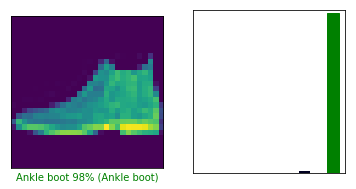

In [23]:
#Look at the 0th image, predictions, and prediction array.

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

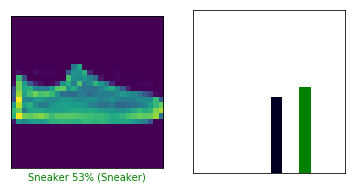

In [24]:
#Look at the 12th image, predictions, and prediction array.

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

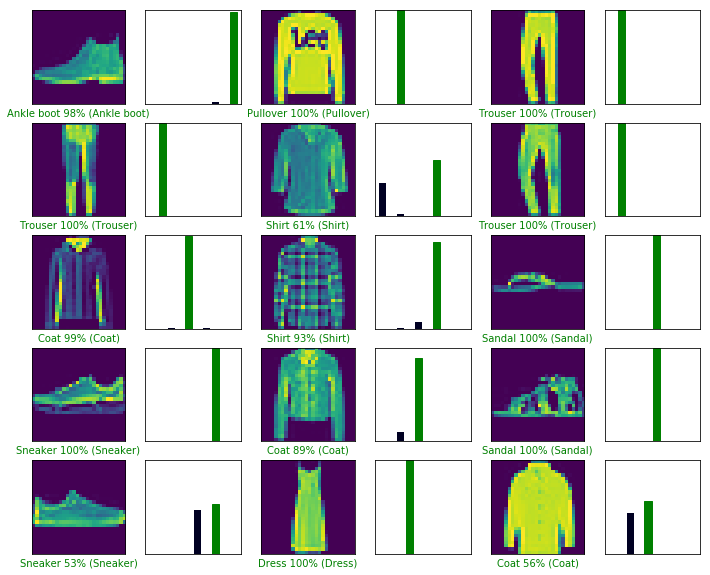

In [25]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [26]:
# Use the trained model to make a prediction about a single image
# Grab an image from the test dataset
img = test_images[0]

img.shape

(28, 28)

In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

img.shape

(1, 28, 28)

In [28]:
#Now predict the image:

predictions_single = model.predict(img)

print(predictions_single)

[[3.1747206e-07 4.8675681e-09 5.9555481e-09 6.3585115e-10 2.9975752e-07
  5.1372266e-05 4.6128232e-08 1.6390597e-02 6.6859243e-08 9.8355734e-01]]


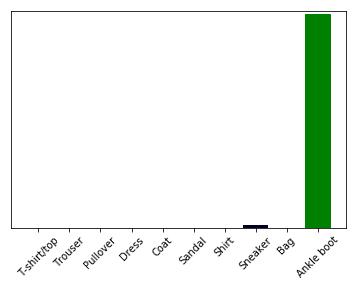

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [30]:
np.argmax(predictions_single[0])

9

And, as before, the model predicts a label of 9.
